# Binary Trees

A binary tree is a tree data structure in which each node has at most two children, which are referred to as the left child and the right child. 

There are two special nodes, the Root and leave nodes.
The Root node is the topmost node in the tree in which all Nodes are connected to and is the only node to not have a parent node.
Leaf nodes are nodes which reside in the last level of a binary tree and they don't have any children.

For more detailed information:
https://en.wikipedia.org/wiki/Binary_tree

We will use the Python Library binarytree to visualize our tree to help us better understand what is going on.

**Make sure that you have the binarytree library installed.
If not find the details here:**
https://pypi.org/project/binarytree/

In [1]:
from binarytree import Node

# Creating a new Node

We will begin by creating a node will will be the basis of our binary tree.

Our node object will consist of three attributes:
data: which will contain the data the Node will hold (For our examples, we will use integers)
left: holds the object of the left Node
right: holds the object of the right Node

Below is the class of the Node object

class Node(object):

    def __init__(self, value, left=None, right=None):
        self.value = value  # The node value
        self.left = left    # Left child
        self.right = right  # Right child

In [2]:
root = Node(1)
print(root)


1



We can see in the above example that after we instantiate the Node that the value of the node is printed.
We can also see that this node does not have either a left child or a right child.

# Inserting a Node to the left

In this next example, we will insert a Node to the left which will be the left child of the root node.

In [3]:
def insert_left(root, value):
    root.left = Node(value)

insert_left(root, 2)
print(root)


  1
 /
2



We can see that by assigning the left attribute of the root node to a new instantiated node with a value of 2. The left child of the root node now has the value of 2.

But what do we do if the node already has a left child. 

We will update our insert_left functon to replace the current left child with a new node and have the current left child be the left child of the new node.

In [4]:
def insert_left(root, value):
    if (root.left):
        old_left = root.left
        root.left = Node(value)
        root.left.left = old_left
    else:
        root.left = Node(value)

insert_left(root, 3)

Here we can see that the Node with the value of 2 has been replaced with 3 and the left node has shifted downward to become the left child of 3 as well.

# Inserting a Node to the right

In this next example, we will insert a Node to the right which will be the right child of the root node.

In [5]:
def insert_right(root, value):
    root.right = Node(value)

insert_right(root, 4)
print(root)


    1
   / \
  3   4
 /
2



We can see that now our root node now has a right child with the value of four. 
However, just like with our insert_left function let's make sure that if there is already a right child to replace it and place it as the right child of the inserted node.

In [6]:
def insert_right(root, value):
    if (root.right):
        old_right = root.right
        root.right = Node(value)
        root.right.right = old_right
    else:
        root.right = Node(value)

insert_right(root, 5)
print(root)


    1
   / \
  3   5
 /     \
2       4



Now, just as with the insert_left function, we now have inserted a node on the right side.

# Delete a Binary Tree

We will now write a function which will delete a binary tree.
Let's start by showing our binary tree

In [7]:
print(root)


    1
   / \
  3   5
 /     \
2       4



Now let's create a function delete_tree which will delete the tree.
We will include a print statement in the function to show which node we are deleting in which order.

In [8]:
def delete_tree(root):
    if not root:
        return
    delete_tree(root.left)
    delete_tree(root.right)
    print("Deleting node:", root.value)
    root.left = None
    root.right = None
    
delete_tree(root)
print("Tree Deleted")

Deleting node: 2
Deleting node: 3
Deleting node: 4
Deleting node: 5
Deleting node: 1
Tree Deleted


We can see from the values that are deleted that in each step we are deleting each node starting from the left branch recursively and then recursively deleting to the right branches before finally deleting the root node.

# Checking if a node is a Leaf Node

We will next create a function which checks if a given Node is a leaf node.
Remember, a leaf node are nodes which reside in the last level of a binary tree and they don't have any children.
So if we check if a node does not have both a left child or a right child, the node must be a leaf node.

Let's create the check_leaf function to check if a node is a leaf and a helper function to print whether a node is a leaf or not. Let's compare the root node and the left most child of root.

Let's first recreate the binary tree that we had before:

In [9]:
root = Node(1)
insert_left(root, 2)
insert_left(root, 3)
insert_right(root, 4)
insert_right(root, 5)

print(root)


    1
   / \
  3   5
 /     \
2       4



In [43]:
def check_leaf(node):
    return not node.left and not node.right

def printif_leaf(node):
    if check_leaf(node):
        print("Node %d is a leaf" %(node.value))
    else:
        print("Node %d is not a leaf" %(node.value))

print(root)
printif_leaf(root)
printif_leaf(root.left.left)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8

Node 1 is not a leaf
Node 4 is a leaf


We can see that the root node (value:1) is not a leaf node because it has two children (3 and 5). However, if we check the Node 2 (root.left.left) we can see that it is a leaf node because there are no children.

# Pre-order Traversal

Tree traversal (also known as tree search) is a form of graph traversal and refers to the process of visiting (checking and/or updating) each node in a tree data structure, exactly once.

There are three types we will cover:
1. Pre-order Traversal
2. In-order Traversal
3. Post-order Traversal

These searches are referred to as depth-first search (DFS), as the search tree is deepened as much as possible on each child before going to the next sibling. For a binary tree, they are defined as display operations recursively at each node.

Say we have the following binary tree:

In [21]:
root = Node(1)
insert_left(root, 4)
insert_left(root, 2)
insert_right(root, 6)
insert_right(root, 3)
insert_left(root.right, 7)
insert_left(root.right, 5)
insert_right(root.right.left, 8)

print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



In Pre-order traversal, we start at the root and traverse down the left branch until we reach the lowest level on the left. Then we move over to the top of the right branch and recursively traverse the left side until we reach the end of the right branch.

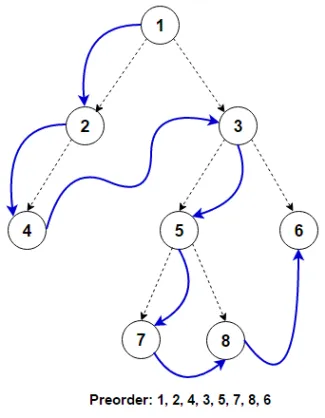

In [25]:
def preorder_traversal(root):
    if not root:
        return
    print(root.value, end=' ')
    preorder_traversal(root.left)
    preorder_traversal(root.right)

preorder_traversal(root)

1 2 4 3 5 7 8 6 

# In-order Traversal

For In-order traversal, as the name suggests we start at the very left node first, then traverserse through to the right in order from left to right with the root somewhere in the middle.

As can be seen in this image:

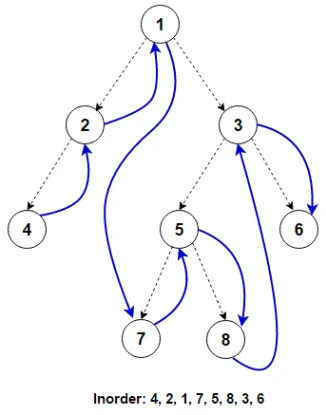

In [27]:
def inorder_traversal(root):
    if not root:
        return
    inorder_traversal(root.left)
    print(root.value, end=' ')
    inorder_traversal(root.right)

inorder_traversal(root)

2 4 1 3 5 7 8 6 

# Post-order Traversal

Lastly in Post-order traversal, we take these three steps:
1. Recursively traverse the left subtree
2. Then recursively traverse through the right subtree
3. Then finally process the root node at the end

Again, here is an image which describes a Post-order traversal:

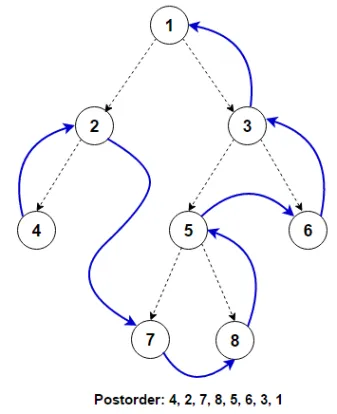

In [28]:
def postorder_traversal(root):
    if not root:
        return
    postorder_traversal(root.left)
    postorder_traversal(root.right)
    print(root.value, end=' ')

postorder_traversal(root)

4 2 7 8 5 6 3 1 

# The Height of a Binary Tree

The height of a binary tree is the largest number of edges in a path from the root node to a leaf node. Essentially, it is the height of the root node. Note that if a tree has only one node, then that node is at the same time the root node and the only leaf node, so the height of the tree is 0.

Let's take the following binary tree:

In [29]:
print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



If we count the edges from root down the longest branch on the left side we find 2 edges. However, if we count the edges of the longest branch on the right side we find 3 edges. Therefore, this tree would have the height of 3.

Here is the following code to find the height of a binary tree:

In [36]:
 def find_height(root):
     if not root:
         return -1
     else:
         left = find_height(root.left)
         right = find_height(root.right)
         return max(left, right) + 1
       
print("The height of this binary tree is %d" %(find_height(root)))

The height of this binary tree is 3


# Size of a Binary Tree

The size of a binary tree is the total number of nodes in that tree.

So to find the size of a binary tree we will traverse the whole tree and count the number of nodes in the tree.

Let's use the same tree again:

In [33]:
print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



In [35]:
def find_size(root):
    if not root:
        return 0
    else:
        return find_size(root.left) + find_size(root.right) + 1
    
print("The size of the tree is %d" %(find_size(root)))

Size of the tree is 8


# Counting the Leaves in a Binary Tree

Leaf nodes are nodes which reside in the last level of a binary tree and they don't have any children. 

Let's try to count the number of leaves in a binary tree.
We will use the same tree again.

In [44]:
print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



In [45]:
 def count_leaves(root):
     if not root:
         return 0
     if (not root.left and not root.right):
         return 1
     else:
         return count_leaves(root.left) + count_leaves(root.right)
        
print("There are %d leaves in this tree" %count_leaves(root))

There are 4 leaves in this tree


# 